# Naive Bayes with sklearn

We saw in class that Naive Bayes is a probabilistic classifier, that can easily support categorical and quantitative variables.

Problem is ... `sklearn` does not natively work with both ...

We will need to split again our data in quantitative and qualitative, and then code our own suggestions to take both into account.

You can start with quantitative or qualitative data depending on the majority data type in your dataset.

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

df = pd.read_csv("../pokemon.csv")


In [82]:
# My target is survived 
y = df.is_legendary.values
# For demonstration, I'm taking only 4 columns
categorical_variables = ["type1", "type2"]
quantitative_variables = ['defense', 'experience_growth', 'height_m', 'hp',
       'percentage_male']

X = df[categorical_variables + quantitative_variables].values

X_quantitative = df[quantitative_variables].fillna(df[quantitative_variables].mean()).values

X_categorical = df[categorical_variables].values

X_quantitative

array([[4.9000000e+01, 1.0598600e+06, 7.0000000e-01, 4.5000000e+01,
        8.8100000e+01],
       [6.3000000e+01, 1.0598600e+06, 1.0000000e+00, 6.0000000e+01,
        8.8100000e+01],
       [1.2300000e+02, 1.0598600e+06, 2.0000000e+00, 8.0000000e+01,
        8.8100000e+01],
       ...,
       [5.3000000e+01, 1.2500000e+06, 5.5000000e+00, 2.2300000e+02,
        5.5155761e+01],
       [1.0100000e+02, 1.2500000e+06, 2.4000000e+00, 9.7000000e+01,
        5.5155761e+01],
       [1.1500000e+02, 1.2500000e+06, 1.0000000e+00, 8.0000000e+01,
        5.5155761e+01]])

## Working with quantitative data
With quantitative data, we can use the `GaussianNB` class.

In [14]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report

In [24]:
gaussian_nb = GaussianNB()

print("======= Training")
gaussian_nb.fit(X_quantitative, y)

print("======= Prediction")
predictions = gaussian_nb.predict(X_quantitative)

print("======= Results")
print(classification_report(y, predictions))

======= Training
======= Prediction
======= Results
              precision    recall  f1-score   support

           0       0.97      0.95      0.96       731
           1       0.56      0.71      0.62        70

    accuracy                           0.93       801
   macro avg       0.76      0.83      0.79       801
weighted avg       0.94      0.93      0.93       801



In [27]:
predictions = gaussian_nb.predict_proba(X_quantitative)
predictions

array([[9.99999788e-01, 2.12274024e-07],
       [9.99999428e-01, 5.71970536e-07],
       [9.99991501e-01, 8.49874224e-06],
       ...,
       [9.31616236e-05, 9.99906838e-01],
       [1.97572692e-01, 8.02427308e-01],
       [2.62505434e-01, 7.37494566e-01]])

**Questions**:
1. Plot the statistical distribution of your variables and see if any is highly skewed.
2. Apply Gaussian Naive Bayes to the quantitative variables of your dataset.
3. Retrieve class probability and plot the results as a function of the different features, using heatmap colors.
4. Perform k-fold cross-validation and return the classification scores (accuracy, recall, precision).
6. Try removing highly correlated data and see if your results improve.

In [90]:
#1 
daths = pd.read_csv("../Projet/dataMKII.csv")
daths.head()
quan_var = ["cost","health","attack"]
nonvar= ["id","name"]
qual_var = [col for col in daths.columns if col not in quan_var + nonvar]
Xhs = daths[quan_var].values
Xhs_quantitative = daths[quan_var].fillna(-1).values
y = daths.rarity.values

In [51]:
qual_var

['artist',
 'cardClass',
 'set',
 'type',
 'rarity',
 'is_SECRET',
 'is_HEROPOWER_DAMAGE',
 'is_RECEIVES_DOUBLE_SPELLDAMAGE_BONUS',
 'is_INSPIRE',
 'is_BATTLECRY',
 'is_DEATHRATTLE',
 'is_OVERHEAL',
 'is_TRIGGER_VISUAL',
 'is_InvisibleDeathrattle',
 'is_COMBO',
 'is_CHOOSE_ONE',
 'is_AURA',
 'is_OVERLOAD',
 'is_CHARGE',
 'is_DIVINE_SHIELD',
 'is_FORGETFUL',
 'is_SPELLPOWER',
 'is_STEALTH',
 'is_TAUNT',
 'is_CANT_ATTACK',
 'is_TOPDECK',
 'is_DISCOVER',
 'is_HONORABLEKILL',
 'is_RUSH',
 'is_WINDFURY',
 'is_ImmuneToSpellpower',
 'is_FRENZY',
 'is_POISONOUS',
 'is_LIFESTEAL',
 'is_OUTCAST',
 'is_MAGNETIC',
 'is_AFFECTED_BY_SPELL_POWER',
 'is_CANT_BE_TARGETED_BY_SPELLS',
 'is_CANT_BE_TARGETED_BY_HERO_POWERS',
 'is_GEARS',
 'is_FINISH_ATTACK_SPELL_ON_DAMAGE',
 'is_ECHO',
 'is_FREEZE',
 'is_GRIMY_GOONS',
 'is_KABAL',
 'is_JADE_GOLEM',
 'is_JADE_LOTUS',
 'is_TRADEABLE',
 'is_ADJACENT_BUFF',
 'is_ENRAGED',
 'is_DEATH_KNIGHT',
 'is_REBORN',
 'is_START_OF_GAME',
 'is_TWINSPELL',
 'is_MULTIPLY_BUF

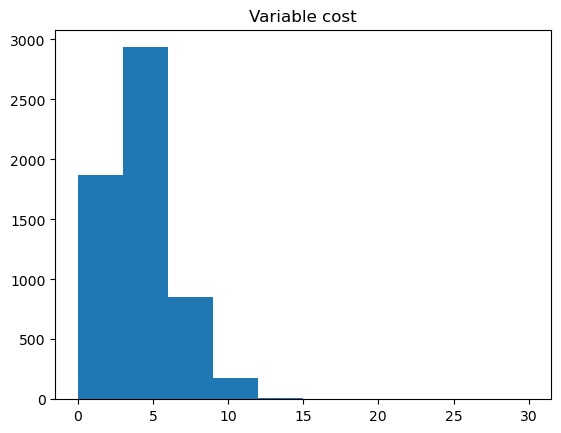

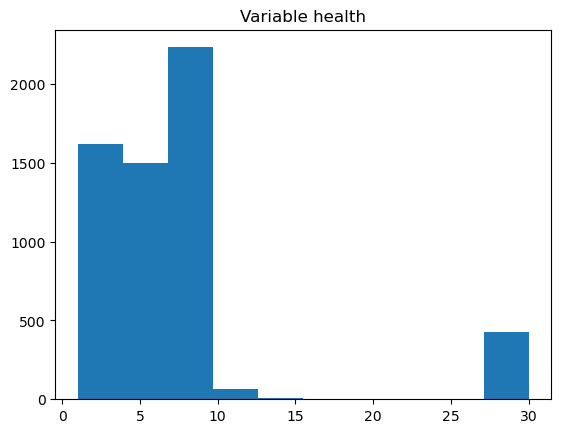

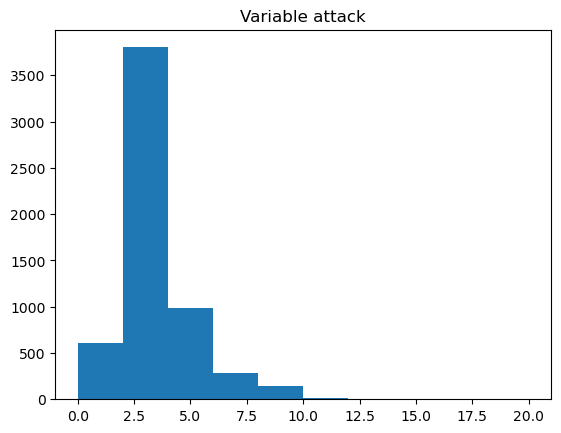

In [53]:
#1
for ix, var in enumerate(Xhs_quantitative.T):
    plt.hist(var)
    plt.title(f"Variable {quan_var[ix]}")
    plt.show()

In [57]:
gaussian_nb = GaussianNB()

print("======= Training")
gaussian_nb.fit(Xhs_quantitative, y)

print("======= Prediction")
predictions = gaussian_nb.predict(Xhs_quantitative)

print("======= Results")
print(classification_report(y, predictions))

======= Training
======= Prediction
======= Results
              precision    recall  f1-score   support

      COMMON       0.45      0.81      0.58      2029
        EPIC       0.31      0.03      0.05       887
        FREE       0.84      0.57      0.68       628
   LEGENDARY       0.48      0.37      0.42       855
        RARE       0.30      0.22      0.26      1446

    accuracy                           0.45      5845
   macro avg       0.48      0.40      0.40      5845
weighted avg       0.44      0.45      0.41      5845



<AxesSubplot: >

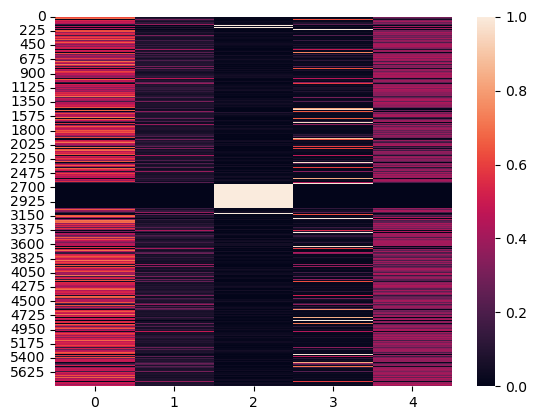

In [56]:
predicted_proba = gaussian_nb.predict_proba(Xhs_quantitative)
sns.heatmap(predicted_proba)

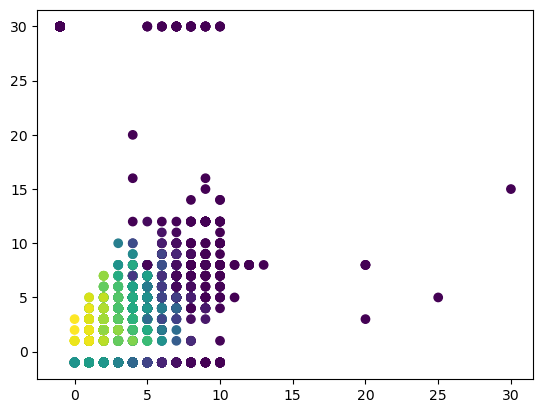

In [95]:
predicted_proba = gaussian_nb.predict_proba(Xhs_quantitative)
plt.scatter(Xhs_quantitative[:,0],Xhs_quantitative[:,1],c=predicted_proba[:,0])

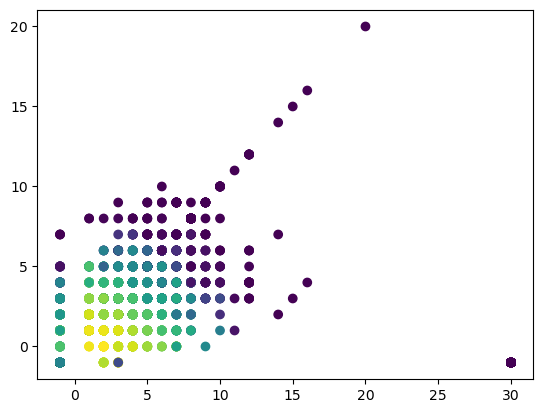

In [96]:
predicted_proba = gaussian_nb.predict_proba(Xhs_quantitative)
plt.scatter(Xhs_quantitative[:,1],Xhs_quantitative[:,2],c=predicted_proba[:,0])

In [87]:
Xhs_quantitative

array([[ 5., 99., 99.],
       [ 3., 99., 99.],
       [ 2.,  2.,  3.],
       ...,
       [ 3., 99., 99.],
       [ 9.,  9.,  9.],
       [ 5.,  3.,  6.]])

In [35]:
from sklearn.model_selection import cross_val_score
from sklearn.dummy import DummyClassifier

In [40]:
dummy_classifier = DummyClassifier(strategy="constant", constant=0)

X = daths[quan_var].values

In [38]:
cross_val_accuracy = cross_val_score(estimator=dummy_classifier, X=X, y=y, scoring="accuracy")
cross_val_precision = cross_val_score(estimator=dummy_classifier, X=X, y=y, scoring="precision")

ValueError: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/home/kali/.local/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/kali/.local/lib/python3.11/site-packages/sklearn/base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/kali/.local/lib/python3.11/site-packages/sklearn/dummy.py", line 233, in fit
    raise ValueError(err_msg)
ValueError: The constant target value must be present in the training data. You provided constant=0. Possible values are: ['COMMON', 'EPIC', 'FREE', 'LEGENDARY', 'RARE'].


In [ ]:
print("========================================")
print(f"=== Average accuracy: {np.mean(cross_val_accuracy)}")
print(f"=== Median accuracy: {np.median(cross_val_accuracy)}")
print("========================================")
print("========================================")

print(f"=== Average precision: {np.mean(cross_val_precision)}")
print(f"=== Median precision: {np.median(cross_val_precision)}")
print("========================================")

## Working with qualitative data
With qualitative data, we can use the class CategoricalNB.

In [45]:
from sklearn.naive_bayes import CategoricalNB
from sklearn.preprocessing import LabelEncoder

In [15]:
encoder = LabelEncoder()
encoded_vars = []
for category in X_categorical.T:
    encoded_vars.append(encoder.fit_transform(category))

In [16]:
X_cat = np.array(encoded_vars).T

In [17]:
gaussian_nb_categorical = CategoricalNB()

print("======= Training")
gaussian_nb_categorical.fit(X_cat, y)

print("======= Prediction")
predictions = gaussian_nb_categorical.predict(X_cat)

print("======= Results")
print(classification_report(y, predictions))

======= Training
======= Prediction
======= Results
              precision    recall  f1-score   support

           0       0.91      1.00      0.95       731
           1       0.00      0.00      0.00        70

    accuracy                           0.91       801
   macro avg       0.46      0.50      0.48       801
weighted avg       0.83      0.91      0.87       801



**Questions**:
1. Apply Gaussian Naive Bayes to the qualitative variables of your dataset.
3. Retrieve class probability and plot the results as a function of the different features, using heatmap colors.
4. Perform k-fold cross-validation and return the classification scores (accuracy, recall, precision).
5. Compare to previous results.
6. Transform every variable within your dataset to a qualitative using the class `sklearn.preprocessing.KBinsDiscretizer` and compare with previous results.
7. Compare to what you achieved using `knn`.

In [47]:
encoder = LabelEncoder()
encoded_vars = []
Xhs_cat = daths[qual_var].values
for category in Xhs_cat.T:
    encoded_vars.append(encoder.fit_transform(category))

In [48]:
X_cat = np.array(encoded_vars).T

In [49]:
gaussian_nb_categorical = CategoricalNB()

print("======= Training")
gaussian_nb_categorical.fit(X_cat, y)

print("======= Prediction")
predictions = gaussian_nb_categorical.predict(X_cat)

print("======= Results")
print(classification_report(y, predictions))

======= Training
======= Prediction
======= Results
              precision    recall  f1-score   support

      COMMON       1.00      1.00      1.00      2029
        EPIC       1.00      0.99      1.00       887
        FREE       0.99      1.00      1.00       628
   LEGENDARY       1.00      1.00      1.00       855
        RARE       1.00      1.00      1.00      1446

    accuracy                           1.00      5845
   macro avg       1.00      1.00      1.00      5845
weighted avg       1.00      1.00      1.00      5845



/tmp/ipykernel_57483/2400933567.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  daths[qual_var].corr()


<AxesSubplot: >

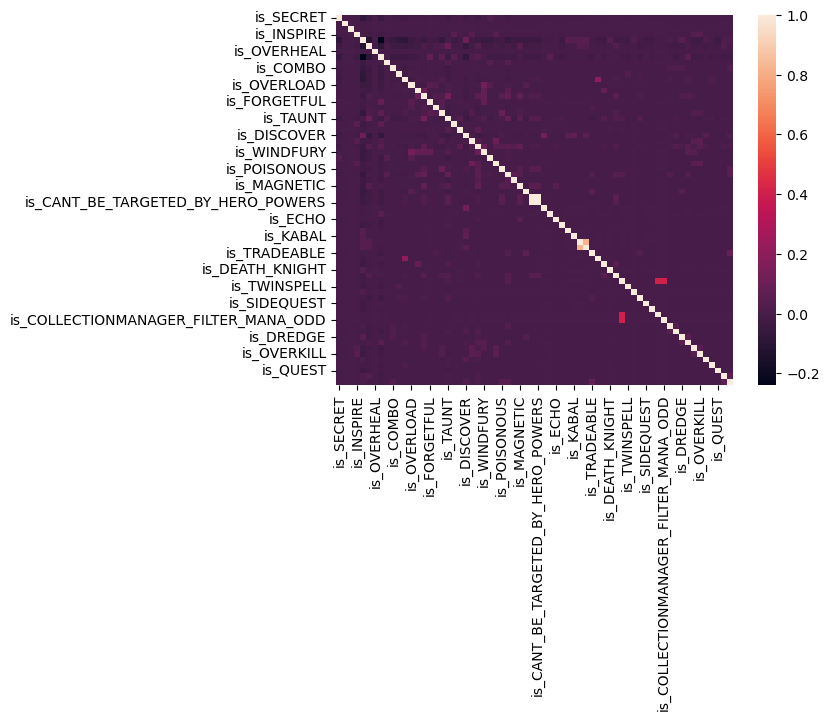

In [52]:
sns.heatmap(
    daths[qual_var].corr()
)

## Working with both data types
It is annoying that sklearn does not allow to deal with both variables types...

A solution to solve this is to:
- Fit a GaussianNB on the quantitative variables and get the probabilities `quantitative_probabilities`
- Fit a CategoricalNB on the qualitative variables `qualitative_probabilities`
- Fit a new GaussianNB on the probbailities `quantitative_probabilities` and `qualitative_probabilities`.

**Question**:
1. Implement this solution and compare the results with what you obtained previously.
2. **Bonus**: Suggest your own implementation using `sklearn` API for classifiers (see https://scikit-learn.org/stable/developers/develop.html).


In [60]:
# Next step to do: use train / test or cross val approach using this method.